<a href="https://colab.research.google.com/github/crazygovind/AI-Foundation-Whitehat-Jr/blob/master/57_Project_Diamond_price_prediction_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project 15: Diamond Price Prediction 

---

### Context

Diamond is one of the precious stones which are always in huge demand in the investment market. Diamonds are also used in many industrial applications like cutting but it is mostly used as a gemstone. The actual price of a diamond however is determined by a gemologist after examining its various features such as its carat, cut, color, and clarity. Dimensions of a diamond is also a very important parameter to determine its worth. Nearly, 142 million carats of diamonds were produced worldwide in 2019 alone. This makes it very important to come up with some smart technique to estimate its worth. 




 
 

---

### Problem Statement

A diamond distributor decided to put almost 2000 diamonds for auction. A jewellery company is interested in making a bid to purchase these diamonds in order to expand their business. As a data scientist, your job is to build a prediction model to predict the price of diamonds so that your company knows how much it should bid.













---

### Data Description

The **diamonds** dataset contains the prices and other attributes of almost 54,000 diamonds. Following are the attributes:  


|Column|Description|
|---:|:---|
|`carat`|weight of the diamond|
|`cut`|quality of the cut|
|`color`|diamond colour, from J (worst) to D (best)|
|`clarity`|a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))|
|`table`|The width of the diamond's table expressed as a percentage of its average diameter|
|`price`|price in US dollars|
|`x`|length in mm|
|`y`|width in mm|
|`z`|depth in mm|
|`depth`|total depth percentage = $\frac{2z}{x + y}$|

  **Dataset Link:** https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/diamonds.csv


---

### Things To Do

1. Explore the diamond dataset by creating the following plots:
   - Box plots between each categorical feature and the `price`.
   - Scatter plots between the numerical features and the `price`.
   
2. Convert categorical attributes into numerical attributes.

3. Create a correlation heatmap for all the columns.

4. Build a linear regression model by selecting the most relevant features to predict the price of diamonds.

5. Reduce multicollinearity (if exists) by eliminating highly correlated and high VIF features.

5. Evaluate the linear regression model by calculating the parameters such as coefficient of determination, MAE, MSE, RMSE, mean of residuals and by checking for homoscedasticity.



---

#### 1. Import Modules and Load Dataset

Link to the dataset: https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/diamonds.csv


In [1]:
# Import the required modules and load the dataset.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [2]:
# Get the information on DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [3]:
# Check if there are any null values. If any column has null values, treat them accordingly
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [4]:
# Drop 'Unnamed: 0' column as it is of no use
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


---

#### 2. Exploratory Data Analysis

We need to predict the value of `price` variable, using other variables. Thus, `price` is the target or dependent variable and other columns except `price` are the features or the independent variables. 

Perform the following tasks:

- Create Box plots between each **categorical** variable and the target variable `price` to sense the distribution of values.

- Create the Scatter plots between each **numerical** variable and the target variable `price`. Determine which variable(s) shows linear relationship with the target variable `price`. 

- Create a normal distribution curve for the `price`.


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


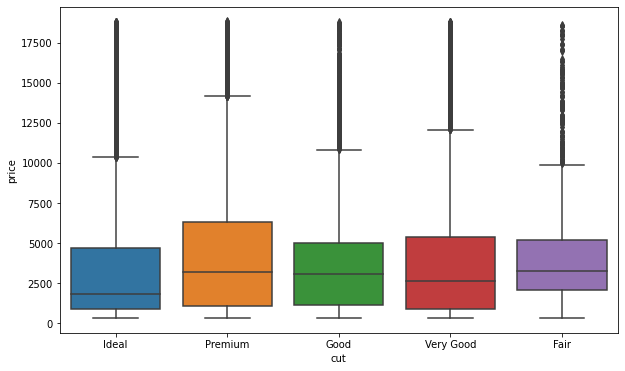

In [5]:
# Boxplot for 'cut' vs 'price'
plt.figure(figsize=(10,6))
sns.boxplot(df['cut'],df['price'])
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


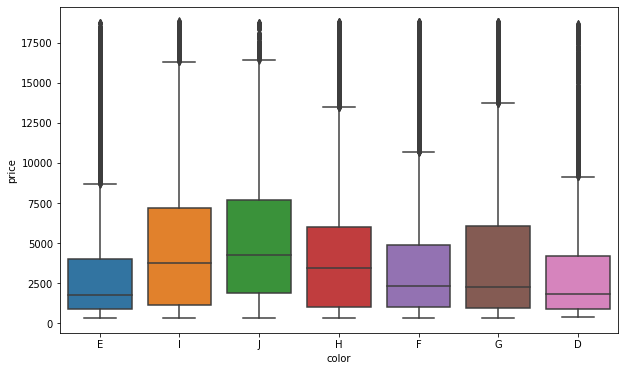

In [6]:
# Boxplot for 'color' vs 'price'
plt.figure(figsize=(10,6))
sns.boxplot(df['color'],df['price'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


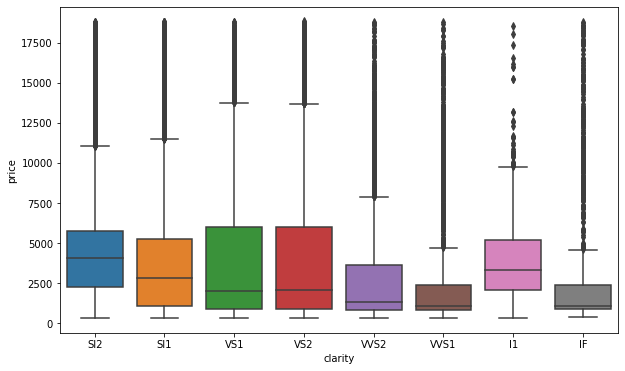

In [7]:
# Boxplot for 'clarity' vs 'price'
plt.figure(figsize=(10,6))
sns.boxplot(df['clarity'],df['price'])
plt.show()

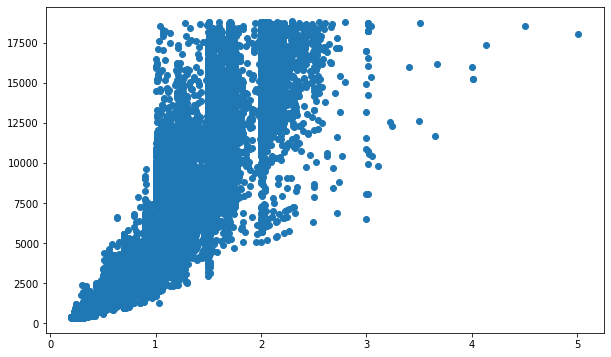

In [8]:
# Create scatter plot with 'carat' on X-axis and 'price' on Y-axis
plt.figure(figsize=(10,6))
plt.scatter(df['carat'],df['price'])
plt.show()

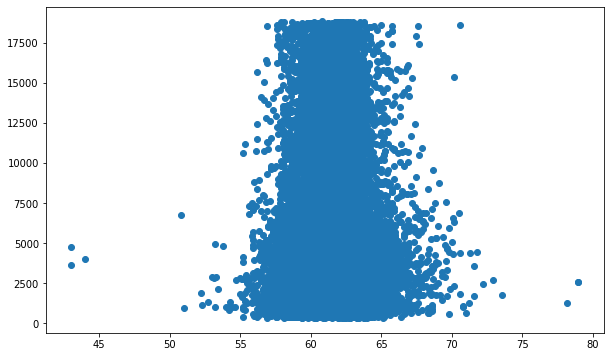

In [9]:
# Create scatter plot with 'depth' on X-axis and 'price' on Y-axis
plt.figure(figsize=(10,6))
plt.scatter(df['depth'],df['price'])
plt.show()

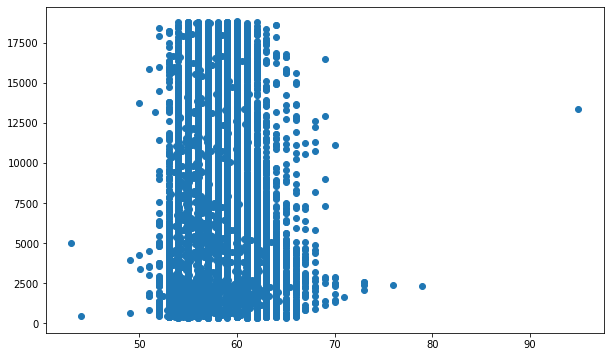

In [10]:
# Create scatter plot with 'table' on X-axis and 'price' on Y-axis
plt.figure(figsize=(10,6))
plt.scatter(df['table'],df['price'])
plt.show()

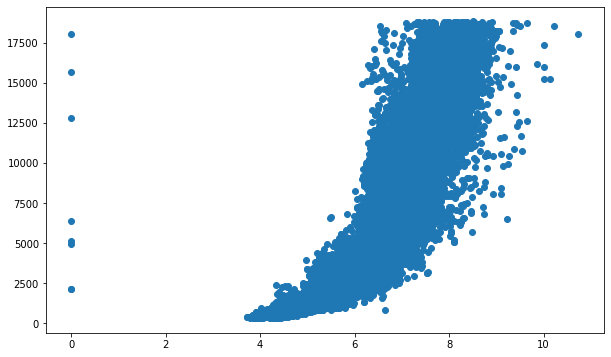

In [11]:
# Create scatter plot with attribute 'x' on X-axis and 'price' on Y-axis
plt.figure(figsize=(10,6))
plt.scatter(df['x'],df['price'])
plt.show()

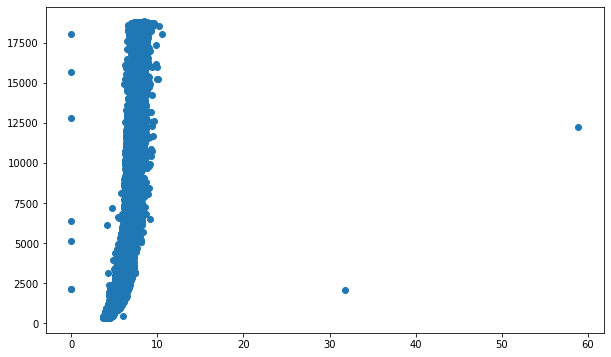

In [12]:
# Create scatter plot with attribute 'y' on X-axis and 'price' on Y-axis
plt.figure(figsize=(10,6))
plt.scatter(df['y'],df['price'])
plt.show()
            

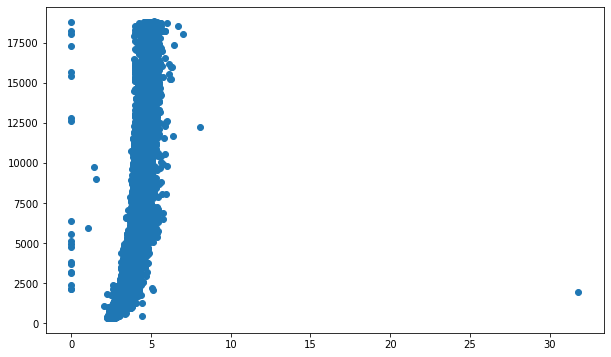

In [13]:
# Create scatter plot with 'z' on X-axis and 'price' on Y-axis
plt.figure(figsize=(10,6))
plt.scatter(df['z'],df['price'])
plt.show()

**Q:** Which attribute exhibit the best linear relationship with the target variable `price`?

**A:**

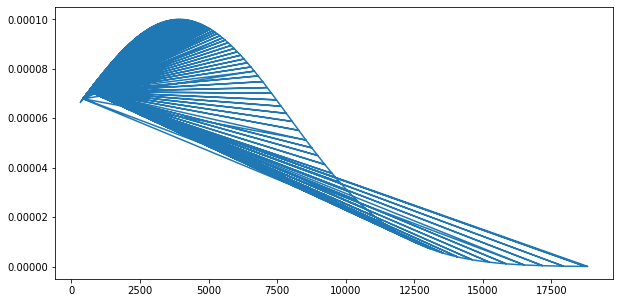

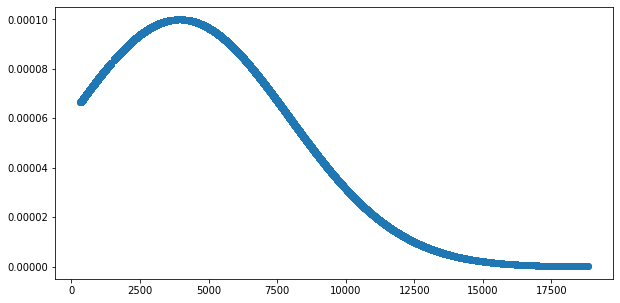

In [26]:
# Create a normal distribution curve for the `price`.
from scipy.stats import norm
import statistics
plt.figure(figsize=(10,5))
mean = statistics.mean(df['price'])
sd = statistics.stdev(df['price'])
plt.plot(df['price'], norm.pdf(df['price'], mean, sd))

# Create a probability density function for plotting the normal distribution


# Plot the normal distribution curve using plt.scatter() 
plt.figure(figsize=(10,5))
plt.scatter(df['price'], norm.pdf(df['price'], mean, sd))

**Q:** What is the mean `price` of diamonds ?

**A:** 



---

#### 3. Feature Engineering

The dataset contains certain features that are categorical.  To convert these features into numerical ones, use `replace()` function of the DataFrame. 

**For example:** 

`df["column1"].replace({"a": 1, "b": 0}, inplace=True)` $\Rightarrow$ replaces all the `'a'` values with `1` and `'b'` values with `0` for feature `column1`. Use `inplace` boolean argument to to make changes in the DataFrame permanently.

Replace following values for `cut` column:

 - `Fair` with `1`
 - `Good` with `2`
 - `Very Good` with `3` 
 - `Premium` with `4`
 - `Ideal` with `5`

Replace following values for the `color` column:

- `D` with `1`
- `E` with `2`
- `F` with `3`
- `G` with `4`
- `H` with `5`
- `I` with `6`

Replace following values for the `clarity` column:

- `I1` with `1` 
- `SI2` with `2`
- `SI1` with `3`
- `VS2` with `4`
- `VS1` with `5`
- `VVS2` with `6`
- `VVS1` with `7`
- `IF` with `8`

In [35]:
# Replace values of 'cut' column
df['cut'].replace({'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5},inplace=True)

In [41]:
# Replace values of 'color' column
df['color'].replace({'D':1,'E':2,'F':3,'G':4,'H':5,'I':6,'J':7},inplace=True)

In [44]:
# Replace values of 'clarity' column
df['clarity'].replace({'I1':1,'SI2':2,'SI1':3,'VS2':4,'VS1':5,'VVS2':6,'VVS1':7,'IF':8},inplace=True)


---

#### 4. Model Training 

Build a multiple linear regression model  using all the features of the dataset. Also, evaluate the model by calculating $R^2$, MSE, RMSE, and MAE values.


In [45]:
# Create a list of feature variables.
features=list(df.columns)
features.remove('price')
features

['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']

In [52]:
# Build multiple linear regression model using all the features
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error



# Split the DataFrame into the train and test sets such that test set has 33% of the values.
X=df[features]
y=df['price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)


y_train_reshaped=y_train.values.reshape(-1,1)
y_test_reshaped=y_test.values.reshape(-1,1)

# Build linear regression model using the 'sklearn.linear_model' module.
lr=LinearRegression()
lr.fit(X_train,y_train_reshaped)

# Print the value of the intercept
print(lr.intercept_)

# Print the names of the features along with the values of their corresponding coefficients.
for i in list(zip(X.columns.values,lr.coef_[0])):
  print(i[0],i[1])


[5423.68070959]
carat 10720.976565938461
cut 118.65815338315554
color -323.8142457625743
clarity 504.0142581749525
depth -79.94879374426029
table -28.248562766541824
x -846.5536352687619
y 23.15037371968134
z -29.51232887395753


In [53]:
# Evaluate the linear regression model using the 'r2_score', 'mean_squared_error' & 'mean_absolute_error' functions of the 'sklearn' module.
import numpy as np

y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)

print(r2_score(y_train_reshaped,y_train_pred))
print(mean_squared_error(y_train_reshaped,y_train_pred))
print(np.sqrt(mean_squared_error(y_train_reshaped,y_train_pred)))
print(mean_absolute_error(y_train_reshaped,y_train_pred),'\n')

print(r2_score(y_test_reshaped,y_test_pred))
print(mean_squared_error(y_test_reshaped,y_test_pred))
print(np.sqrt(mean_squared_error(y_test_reshaped,y_test_pred)))
print(mean_absolute_error(y_test_reshaped,y_test_pred))

0.906946407279373
1494736.330174262
1222.5940986992625
809.2469371584999 

0.9071113643757661
1450250.5834271258
1204.2635024890217
802.6262980249433


**Q:** What is the $R^2$ (R-squared) value for this model?

**A:** 0.9071113643757661



---

### 5. Dealing with Multicollinearity

Create a heatmap among all variables to identify a set of features which are highly correlated with each other.


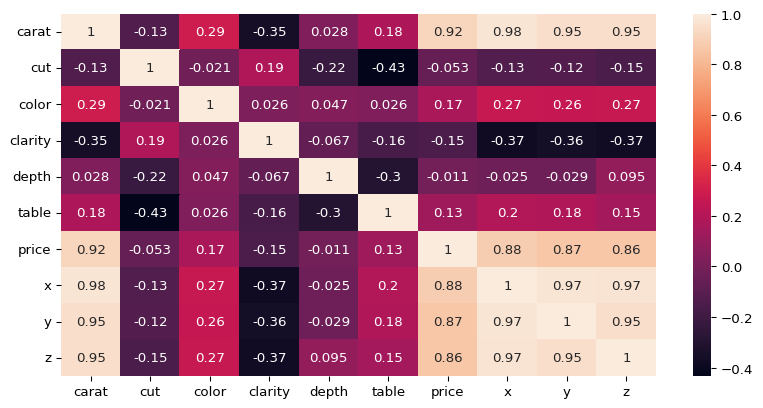

In [54]:
# Heatmap to pinpoint the columns in the 'df' DataFrame exhibiting high correlation
plt.figure(figsize=(10,5),dpi=96)
sns.heatmap(df.corr(),annot=True)

**Q:** Which features are highly correlated with `price`?

**A:** carat and X

**Q:** Is there multicollinearity in the dataset?

**A:** Yes

Let's consider the feature `carat` as it is highly correlated with the target variable `price`. Perform the following tasks:
1. Drop the features which are highly correlated with `carat`.
2. Calculate VIF (Variance Inflation Factor) for the remaining features.


In [ ]:
# Drop features highly correlated with 'carat'
features.remove('x')
features.remove('z')
features.remove('y')
features

In [61]:
# Again build a linear regression model using the remaining features


X=df[features]
y=df['price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

y_train_reshaped=y_train.values.reshape(-1,1)
y_test_reshaped=y_test.values.reshape(-1,1)

# Build linear regression model using the 'sklearn.linear_model' module.
lr.fit(X_train,y_train_reshaped)

# Print the value of the intercept
print(lr.intercept_)

# Print the names of the features along with the values of their corresponding coefficients.
for i in list(zip(X.columns.values,lr.coef_[0])):
  print(i[0],i[1])

[-150.87464723]
carat 8799.49806012575
cut 119.7981494932418
color -319.16378391086425
clarity 523.0499676913744
depth -45.01920851568734
table -27.742288259108307


In [62]:
# Evaluate the linear regression model using the 'r2_score', 'mean_squared_error' & 'mean_absolute_error' functions of the 'sklearn' module.
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)

print(r2_score(y_train_reshaped,y_train_pred))
print(mean_squared_error(y_train_reshaped,y_train_pred))
print(np.sqrt(mean_squared_error(y_train_reshaped,y_train_pred)))
print(mean_absolute_error(y_train_reshaped,y_train_pred),'\n')

print(r2_score(y_test_reshaped,y_test_pred))
print(mean_squared_error(y_test_reshaped,y_test_pred))
print(np.sqrt(mean_squared_error(y_test_reshaped,y_test_pred)))
print(mean_absolute_error(y_test_reshaped,y_test_pred))


0.9044425761799156
1534955.8122980236
1238.9333365028256
857.542253153202 

0.9042763237189244
1494513.4724123492
1222.5029539483123
850.5538478277897


Now eliminate the features having VIF values above 10 (if any).

In [67]:
# Calculate the VIF values for the remaining features using the 'variance_inflation_factor' function.

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
# Add a constant to feature variables 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)
X_train_sm2=sm.add_constant(X_train)
# Create a dataframe that will contain the names of the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=X_train_sm2.columns
vif['vif values']=[variance_inflation_factor(X_train_sm2.values,i)for i in range(X_train_sm2.values.shape[1])]
vif

,Features,vif values
0,const,5310.642924
1,carat,1.291930
2,cut,1.481217
3,color,1.119229
4,clarity,1.194935
5,depth,1.320845
6,table,1.576678


**Q**: Which of the features have VIF values above 10?

**A**: All features


Proceed with the below 4 code cells only if any of the features have VIF value above 10, otherwise jump to **6. Residual (Error) Analysis** section.  

In [ ]:
# Create a list of features having VIF values less than 10 


In [ ]:
# Again build a linear regression model using the features whose VIF values are less than 10 


# Build linear regression model using the 'sklearn.linear_model' module.


# Print the value of the intercept


# Print the names of the features along with the values of their corresponding coefficients.


In [ ]:
# Evaluate the linear regression model using the 'r2_score', 'mean_squared_error' & 'mean_absolute_error' functions of the 'sklearn' module.

In [ ]:
# Again calculate the VIF values for the remaining features to find out if there is still multicollinearity


---

#### 6. Residual (Error) Analysis

Perform residual analysis to check if the residuals (errors) are normally distributed or not (which is one of the assumption of linear regression). For this, plot the  histogram of the residuals.

(array([7.0000e+00, 2.9000e+01, 2.3000e+02, 8.6300e+02, 4.2780e+03,
        2.2362e+04, 7.9410e+03, 3.1900e+02, 4.3000e+01, 3.9000e+01,
        1.1000e+01, 9.0000e+00, 2.0000e+00, 2.0000e+00, 3.0000e+00,
        0.0000e+00, 1.0000e+00]),
 array([-9630.01188312, -7902.37829595, -6174.74470878, -4447.11112162,
        -2719.47753445,  -991.84394728,   735.78963989,  2463.42322706,
         4191.05681423,  5918.6904014 ,  7646.32398856,  9373.95757573,
        11101.5911629 , 12829.22475007, 14556.85833724, 16284.49192441,
        18012.12551157, 19739.75909874]),
 <a list of 17 Patch objects>)

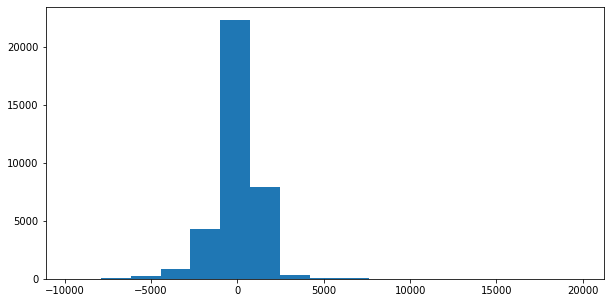

In [75]:
# Create a histogram for the errors obtained in the predicted values for the train set.
plt.figure(figsize=(10,5))
plt.hist(y_train_pred-y_train_reshaped,bins='sturges')

(array([1.8000e+01, 1.6500e+02, 8.6900e+02, 1.0785e+04, 5.8410e+03,
        9.4000e+01, 1.6000e+01, 6.0000e+00, 3.0000e+00, 4.0000e+00]),
 array([-8837.14933763, -6497.34229059, -4157.53524354, -1817.7281965 ,
          522.07885055,  2861.88589759,  5201.69294463,  7541.49999168,
         9881.30703872, 12221.11408577, 14560.92113281]),
 <a list of 10 Patch objects>)

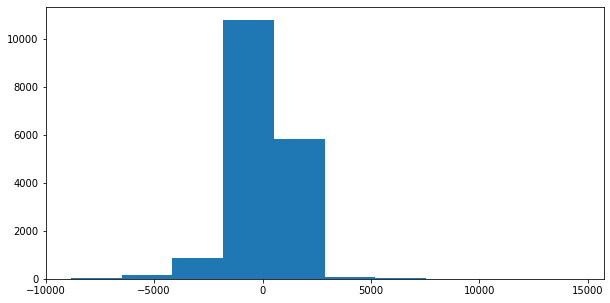

In [73]:
# Create a histogram for the errors obtained in the predicted values for the test set.
plt.figure(figsize=(10,5))
plt.hist(y_test_pred-y_test_reshaped)

**Q:** Is the mean of errors equal to 0 for train set?

**A:** YES

**Q:** Is the mean of errors equal to 0 for test set?

**A:** YES

---

#### 7. Verify Homoscedasticity 

Check for Homoscedasticity (constant variance) by creating a scatter plot between the errors and the target variable. Determine whether there is some kind of relationship between the error and the target variable.

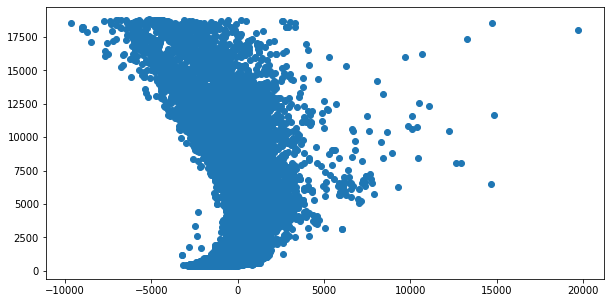

In [78]:
# Create a scatter plot between the errors and the dependent variable for the train set.
plt.figure(figsize=(10,5))
errors=y_train_pred-y_train_reshaped
plt.scatter(errors,y_train_reshaped)


**Q:** Do you find any pattern or trend in the scatter plot? Whether the residuals exhibit constant variance around mean of errors?

**A:** 



---